<a href="https://colab.research.google.com/github/DrPasidth/Thailand-IOT-4.0/blob/master/CNNcifarByKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import cv2

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
from google.colab.patches import cv2_imshow

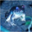

In [6]:
cv2_imshow(x_train[0])

In [7]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [8]:
print(y_train[0])

[6]


In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(128,(3,3), input_shape=(32,32,3), activation='relu', padding='same'))

In [13]:
model.add(MaxPooling2D())

In [14]:
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))

In [15]:
model.add(MaxPooling2D())

In [16]:
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))

In [17]:
model.add(MaxPooling2D())

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(512, activation='relu'))

In [20]:
model.add(Dense(256, activation='relu'))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [23]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [24]:
model.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
391/391 [==============================] - 10s 12ms/step - loss: 1.5503 - accuracy: 0.4323
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1138 - accuracy: 0.6029
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9354 - accuracy: 0.6691
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8106 - accuracy: 0.7178
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7227 - accuracy: 0.7454
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.6517 - accuracy: 0.7697
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.5779 - accuracy: 0.7948
Epoch 8/20
391/391 [==============================] - 4s 11ms/step - loss: 0.5093 - accuracy: 0.8205
Epoch 9/20
391/391 [==============================] - 4s 10ms/step - loss: 0.4592 - accuracy: 0.8366
Epoch 10/20
391/391 [==============================] - 4s 10ms/step - loss: 0.3958 - accur

In [25]:
model.evaluate(x=x_test, y=y_test,batch_size=128)

79/79 [==============================] - 1s 7ms/step - loss: 1.4438 - accuracy: 0.7407


[1.4437586069107056, 0.7407000064849854]

In [26]:
labels = ['Airplane','Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck']

In [29]:
width = 32
height = 32
channel = 3

In [27]:
predict_image = "/content/truck.jpg"

In [31]:
predict_image = "/content/airplane.jpg"

In [43]:
predict_image = "/content/car.jpg"

In [41]:
predict_image = "/content/cat.jpg"

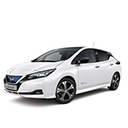

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 16ms/step
[[3.5153867e-21 1.0000000e+00 2.2409361e-35 2.0053515e-31 0.0000000e+00
  1.6733330e-35 2.9794719e-25 0.0000000e+00 3.9809070e-19 6.9935301e-13]]
1
 predict: Car


In [44]:
import cv2
image = cv2.imread(predict_image)
cv2_imshow(image)

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (32,32))
print(image.shape)

image = image/255
image = image.reshape(1,width,height,channel)
print(image.shape)

output = model.predict(image)
print(output)
print(np.argmax(output))

predictlabel = labels[np.argmax(output)]
print(f" predict: {predictlabel}")